In [1]:
import pandas as pd
import numpy as np
us=pd.read_csv("problem2_usage.csv")
us.head(3)

,timestamp,usage
0,2551780740,583.7395
1,2534068740,1018.0731
2,2545732740,1034.5041


In [2]:
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  1460 non-null   int64  
 1   usage      1460 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [3]:
ush=pd.read_csv("problem2_usage_history.csv")
ush.head(3)

,hh:mm,6hour_index,A,B,C,D,E
0,00:00,DA_588493,0.0000,0.0000,0.0000,0.0000,0.0000
1,00:01,DA_588493,0.7025,0.8029,0.6523,2.6762,0.1505
2,00:02,DA_588493,1.7563,1.2043,1.9570,3.2115,0.6022


In [4]:
us['time']=pd.to_datetime(us['timestamp'], unit='s')
#초단위의 timestamp라는 것을 알려줌
us=us.sort_values('time').reset_index(drop=True)
us.head(3)

,timestamp,usage,time
0,2524629540,1654.2596,2050-01-01 05:59:00
1,2524651140,1426.9071,2050-01-01 11:59:00
2,2524672740,1448.2517,2050-01-01 17:59:00


In [5]:
#누적된 사용량만 남김
s=ush[ush['hh:mm'].isin(['05:59','11:59', '17:59', '23:59'])]
s2=s.copy()
s2.head(3)

,hh:mm,6hour_index,A,B,C,D,E
359,05:59,DA_588493,350.9036,401.0326,217.2260,534.7102,150.3872
719,11:59,DA_9340234,835.9658,216.1980,158.5453,144.1320,72.0660
1079,17:59,DA_3352244,234.0609,833.8419,248.6897,117.0304,14.6288


In [6]:
s2.loc[:, 't']=s.iloc[:,2:].sum(axis=1).round(4)
s2

,hh:mm,6hour_index,A,B,C,D,E,t
359,05:59,DA_588493,350.9036,401.0326,217.2260,534.7102,150.3872,1654.2596
719,11:59,DA_9340234,835.9658,216.1980,158.5453,144.1320,72.0660,1426.9071
1079,17:59,DA_3352244,234.0609,833.8419,248.6897,117.0304,14.6288,1448.2517
1439,23:59,DA_9075768,162.1927,297.3533,94.6124,716.3510,67.5803,1338.0897
1799,05:59,DA_6294458,269.1807,490.8591,63.3366,142.5075,601.6981,1567.5820
...,...,...,...,...,...,...,...,...
524159,23:59,DA_6116290,125.7840,67.0849,75.4704,394.1233,167.7121,830.1747
524519,05:59,DA_5064240,505.7466,82.0129,109.3506,437.4025,218.7012,1353.2138
524879,11:59,DA_8363908,110.4847,501.4306,16.9977,144.4800,67.9906,841.3836
525239,17:59,DA_7102720,639.6188,232.5887,72.6839,421.5669,72.6840,1439.1423


In [7]:
pd.merge(s2.rename(columns={'t':'usage'}).reset_index(drop=True), us)[['6hour_index', 'time']]
#6시간 간격 인덱스, 날짜+시간(time)만 남김

,6hour_index,time
0,DA_588493,2050-01-01 05:59:00
1,DA_9340234,2050-01-01 11:59:00
2,DA_3352244,2050-01-01 17:59:00
3,DA_9075768,2050-01-01 23:59:00
4,DA_6294458,2050-01-02 05:59:00
...,...,...
1455,DA_6116290,2050-12-30 23:59:00
1456,DA_5064240,2050-12-31 05:59:00
1457,DA_8363908,2050-12-31 11:59:00
1458,DA_7102720,2050-12-31 17:59:00


In [8]:
zz=pd.merge(ush, pd.merge(s2.rename(columns={'t':'usage'}).reset_index(drop=True), us)[['6hour_index', 'time']])
#6hour_index 기준으로 합쳐짐
zz.head(3)

,hh:mm,6hour_index,A,B,C,D,E,time
0,00:00,DA_588493,0.0000,0.0000,0.0000,0.0000,0.0000,2050-01-01 05:59:00
1,00:01,DA_588493,0.7025,0.8029,0.6523,2.6762,0.1505,2050-01-01 05:59:00
2,00:02,DA_588493,1.7563,1.2043,1.9570,3.2115,0.6022,2050-01-01 05:59:00


In [9]:
q=zz[zz['hh:mm'].isin(['05:59', '11:59', '17:59', '23:59'])].copy()
q.head(3)
q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 359 to 525599
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hh:mm        1460 non-null   object        
 1   6hour_index  1460 non-null   object        
 2   A            1460 non-null   float64       
 3   B            1460 non-null   float64       
 4   C            1460 non-null   float64       
 5   D            1460 non-null   float64       
 6   E            1460 non-null   float64       
 7   time         1460 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 102.7+ KB


In [10]:
q.loc[:, 'date']=q['time'].dt.strftime('%Y-%m')
q.head(3)

,hh:mm,6hour_index,A,B,C,D,E,time,date
359,05:59,DA_588493,350.9036,401.0326,217.2260,534.7102,150.3872,2050-01-01 05:59:00,2050-01
719,11:59,DA_9340234,835.9658,216.1980,158.5453,144.1320,72.0660,2050-01-01 11:59:00,2050-01
1079,17:59,DA_3352244,234.0609,833.8419,248.6897,117.0304,14.6288,2050-01-01 17:59:00,2050-01


In [11]:
q.groupby('date').sum()

,A,B,C,D,E
date,,,,,
2050-01,25437.7174,29524.6880,26325.6721,26787.3492,24378.5654
2050-02,22587.0869,27962.4256,21188.7855,23261.3711,24636.3545
2050-03,28677.4668,23861.8640,23680.9832,26945.8322,27807.9163
2050-04,24420.2217,27322.6681,26299.6225,27226.8895,24303.1778
2050-05,27028.2178,25173.2009,30392.3686,28374.1651,26624.1963
2050-06,23862.7219,25125.0544,26334.0899,23571.0519,32754.0932
2050-07,26248.3486,25135.6214,28735.8080,31315.0381,27056.5461
2050-08,29171.1880,26769.4921,20612.4922,27432.0263,23671.4985
2050-09,26819.4225,31334.2996,25562.1052,22301.2104,25674.1093


In [12]:
q['day']=q['time'].dt.day_name()

<AxesSubplot:xlabel='day'>

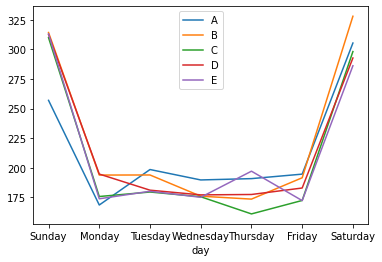

In [13]:
daydf=q.groupby('day').mean().reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
daydf.plot()

In [14]:
daydf

,A,B,C,D,E
day,,,,,
Sunday,256.929379,314.288336,309.893995,312.615013,313.091993
Monday,168.436118,193.759166,175.623832,194.611378,173.696414
Tuesday,198.435064,193.830226,179.424797,180.975285,180.063460
Wednesday,189.627603,175.895540,175.419747,177.002098,174.973855
Thursday,190.748404,173.421020,160.904972,177.331279,197.029684
Friday,194.546056,191.467902,172.280723,182.812973,172.166683
Saturday,305.397108,328.048667,298.182008,292.749169,286.174977


- 연관성 분석

In [15]:
from scipy.stats import chi2_contingency
chi2, p, dof, ef=chi2_contingency(daydf, correction=False)
p

0.6422684883014576

귀무가설을 기각할 수 없다. 즉 요일과 그룹은 독립이다

In [16]:
q

,hh:mm,6hour_index,A,B,C,D,E,time,date,day
359,05:59,DA_588493,350.9036,401.0326,217.2260,534.7102,150.3872,2050-01-01 05:59:00,2050-01,Saturday
719,11:59,DA_9340234,835.9658,216.1980,158.5453,144.1320,72.0660,2050-01-01 11:59:00,2050-01,Saturday
1079,17:59,DA_3352244,234.0609,833.8419,248.6897,117.0304,14.6288,2050-01-01 17:59:00,2050-01,Saturday
1439,23:59,DA_9075768,162.1927,297.3533,94.6124,716.3510,67.5803,2050-01-01 23:59:00,2050-01,Saturday
1799,05:59,DA_6294458,269.1807,490.8591,63.3366,142.5075,601.6981,2050-01-02 05:59:00,2050-01,Sunday
...,...,...,...,...,...,...,...,...,...,...
524159,23:59,DA_6116290,125.7840,67.0849,75.4704,394.1233,167.7121,2050-12-30 23:59:00,2050-12,Friday
524519,05:59,DA_5064240,505.7466,82.0129,109.3506,437.4025,218.7012,2050-12-31 05:59:00,2050-12,Saturday
524879,11:59,DA_8363908,110.4847,501.4306,16.9977,144.4800,67.9906,2050-12-31 11:59:00,2050-12,Saturday
525239,17:59,DA_7102720,639.6188,232.5887,72.6839,421.5669,72.6840,2050-12-31 17:59:00,2050-12,Saturday


In [17]:
days=q.groupby(q['time'].dt.date).sum().reset_index().rename(columns={'time':'date'})

In [18]:
days.head(3)

,date,A,B,C,D,E
0,2050-01-01,1583.1230,1748.4258,719.0734,1512.2236,304.6623
1,2050-01-02,1084.4828,2167.1320,1227.6223,484.2982,1095.9014
2,2050-01-03,152.3612,394.0491,321.2149,982.0407,498.5167


In [19]:
days['date']=pd.to_datetime(days['date'])
days

,date,A,B,C,D,E
0,2050-01-01,1583.1230,1748.4258,719.0734,1512.2236,304.6623
1,2050-01-02,1084.4828,2167.1320,1227.6223,484.2982,1095.9014
2,2050-01-03,152.3612,394.0491,321.2149,982.0407,498.5167
3,2050-01-04,1225.0208,769.0568,655.4110,791.3395,834.6589
4,2050-01-05,836.8017,552.5661,1216.6259,1042.4509,666.6004
...,...,...,...,...,...,...
360,2050-12-27,1131.9901,944.7511,378.1692,438.1096,785.5438
361,2050-12-28,1114.3264,625.4472,1008.9049,914.4681,452.7479
362,2050-12-29,990.3719,776.5802,1085.4244,815.7627,367.3374
363,2050-12-30,1463.7257,908.3342,655.1917,539.5316,852.7281


In [20]:
data=pd.read_csv("problem2_avg_tem.csv")
data.head(3)
data['date']=pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         365 non-null    datetime64[ns]
 1   temperature  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [21]:
result=pd.merge(data,days).corr().iloc[0, 1:].to_frame()

In [22]:
result

,temperature
A,0.001472
B,-0.048002
C,0.045952
D,-0.010146
E,0.074246


In [23]:
q

,hh:mm,6hour_index,A,B,C,D,E,time,date,day
359,05:59,DA_588493,350.9036,401.0326,217.2260,534.7102,150.3872,2050-01-01 05:59:00,2050-01,Saturday
719,11:59,DA_9340234,835.9658,216.1980,158.5453,144.1320,72.0660,2050-01-01 11:59:00,2050-01,Saturday
1079,17:59,DA_3352244,234.0609,833.8419,248.6897,117.0304,14.6288,2050-01-01 17:59:00,2050-01,Saturday
1439,23:59,DA_9075768,162.1927,297.3533,94.6124,716.3510,67.5803,2050-01-01 23:59:00,2050-01,Saturday
1799,05:59,DA_6294458,269.1807,490.8591,63.3366,142.5075,601.6981,2050-01-02 05:59:00,2050-01,Sunday
...,...,...,...,...,...,...,...,...,...,...
524159,23:59,DA_6116290,125.7840,67.0849,75.4704,394.1233,167.7121,2050-12-30 23:59:00,2050-12,Friday
524519,05:59,DA_5064240,505.7466,82.0129,109.3506,437.4025,218.7012,2050-12-31 05:59:00,2050-12,Saturday
524879,11:59,DA_8363908,110.4847,501.4306,16.9977,144.4800,67.9906,2050-12-31 11:59:00,2050-12,Saturday
525239,17:59,DA_7102720,639.6188,232.5887,72.6839,421.5669,72.6840,2050-12-31 17:59:00,2050-12,Saturday
